In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_config(x0 = 0, y0 = 20, n = 30, dx = 1.):
    """Returns the initial configuration of the n chained particles, which is a horizontal line.
    The function returns an array, which has n elements, where each element is a tuple consisting
    of the x- and y-component of the respective particle. The x-coordinates are evenly spaced and
    the y-coordinates are set to some constant y0
    
    Parameters
    ----------
    x0 - x-coordinate of first particle. Standard value is 0.
    y0 - y-coordinate of all particles. Standard value is 20.
    n  - Number of particles, standard value is set to 30.
    dx - Horizontal spacing between neighbouring particles. Standard value is 1
    """
    
    r = np.zeros((n, 2))
    r[:, 0] = np.linspace(x0, x0 + (dx * n), n)
    r[:, 1] = np.array([y0 for _ in range(n)])
    return r

In [3]:
def potential_gradient(r, g = 9.81 , k = 20.):
    
    """Calculates the potential gradient for a given spatial configuration r of n particles in a chain.
    Returns a vector, where the i-th entry is a tuple consisting of the x- and y-coordinate of the gradient for particle i.
    Because the first and last particle are fixed, this function only computes the gradient for the second to the second-to-last particle,
    while for the first and last particle the gradient is always 0.
    
    Parameters
    ----------S
    r - Array that has n-elements and each element has two scalar entries.
    g - Gravitational constant. Default value is 9.81.
    k - Spring constant. Default value is 20.
    """
    
    harmonic_gradient = np.zeros((len(r), 2))
    gravitational_gradient = np.zeros((len(r), 2))
    # Calculate x-component of the gradient of the harmonic potential (dphi/dx_i = k * ( x_i - x_(i-1)) + k * (x_(i+1) - x_i) )
    harmonic_gradient[:, 0][1 : -1] = k * (r[:, 0][1 : -1] - r[:, 0][: -2]) - k * (r[:, 0][2 :] - r[:, 0][1 : -1])
    # Calculate y-component of the gradient of the harmonic potential (dphi/dy_i = k * ( y_i - y_(i-1)) + k * (y_(i+1) - y_i) )
    harmonic_gradient[:, 1][1 : -1] = k * (r[:, 1][1 : -1] - r[:, 1][: -2]) - k * (r[:, 1][2 :] - r[:, 1][1 : -1])
    # Calculate the gradient of the gravitational potential, which only acts in the y-direction (dphi/dy_i = g)
    gravitational_gradient[:, 1][1 : -1] = g
    return harmonic_gradient + gravitational_gradient
        

In [4]:
def gd(potential_gradient, size, r_init, alpha=0.02, g=9.81, k=20.):
    '''Implementation of the gradient-descent method for a given gradient function and a given initial configuration.
    Makes size amount of steps and returns two matrices, one consisting of all configurations and the other
    consisting of all potential gradients calculated during its execution. The i-th row of each matrix is the
    configuration of the system/potential gradient calculated in the i-th step of the function respectively.
    
    Parameters
    ----------
    potential_gradient - Function that calculates the potential gradient, 
                         for a given configuration r. 
                         r is an array, where each element consists 
                         of two scalar components.
    
    size - Amount of steps that are performed by the function
           and also the number of rows inside the resulting matrices.
    
    r_init - Array describing the initial configuration of the system. 
             Each element is a tuple consisting of x- and y-coordinate of the 
             respective particle.
    
    alpha - Scalar factor of the gradient descent method. 
            Standard value is 0.02.
    
    g - Gravitational constant, default value is 9.81
    
    k - Spring constant, default value is 20.'''
    
    n = len(r_init)
    r_matrix, gradient_matrix = np.zeros((size, n ,2)), np.zeros((size, n, 2))
    r_matrix[0] = r_init
    gradient_matrix[0] = potential_gradient(r_init, g, k)
    for i in range(1, size):
        r = r_matrix[i-1]
        current_gradient = potential_gradient(r, g, k)
        r_new = r - alpha * current_gradient
        r_matrix[i] = r_new
        gradient_matrix[i] = current_gradient
    return r_matrix,gradient_matrix

In [5]:
r_init = generate_config()
r_matrix,gradient_matrix = gd(potential_gradient, 10000, r_init)

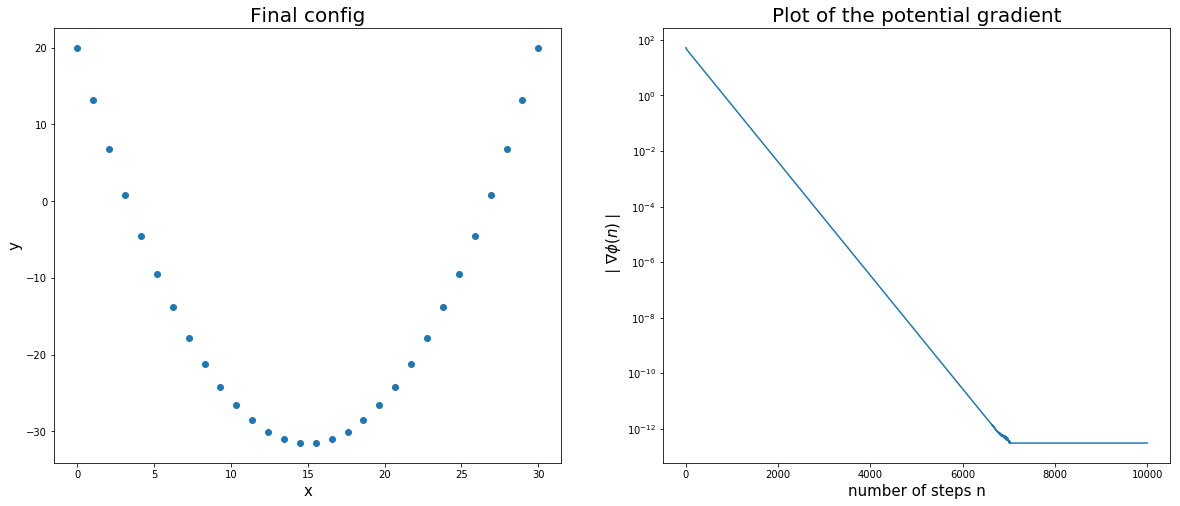

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(r_matrix[-1,:,0],r_matrix[-1,:,1])
axes[0].set_title(r'Final config', fontsize = 20)
axes[0].set_xlabel("x", fontsize=15)
axes[0].set_ylabel("y", fontsize=15)
axes[1].set_title(r'Plot of the potential gradient', fontsize = 20)
axes[1].plot(np.linalg.norm(gradient_matrix, axis=(2,1)))
#axes[1].plot(1/30*np.sum(gradient_matrix,axis=1)[:,0])
#axes[1].plot(1/30*np.sum(gradient_matrix,axis=1)[:,1])
axes[1].set_xlabel("number of steps n", fontsize = 15)
axes[1].set_ylabel(r'$\mid \nabla \phi(n) \mid$', fontsize = 15)
axes[1].set_yscale('log')
plt.show()